## **Assignment 3.1**
#### Author: **Gabriel Elohi Mancillas Gallardo**


### **1. How can a predictive model based on these data be used by Yourcabs.com?**

**Yourcabs.com** can utilize a predictive model to forecast instances of driver cancellations prior. to their actual occurrence. This model leverageshistorical booking data, including factors such as the time of day, location, vehicle type, and travel package, to accurately predict the probability of a driver canceling a trip. With these predictions, **Yourcabs.com** can take **proactive measures**, such as:
- **Reassigning drivers** to at-risk bookings.
- **Notifying customers** ahead of time if a cancellation is likely.
- **Providing incentives** for drivers to complete high-risk trips.

These actions will help reduce service disruptions, improve customer satisfaction, and optimize the company's operational efficiency.

---

### **2. How can a profiling model (identifying predictors that distinguish canceled/uncanceled trips) be used by Yourcabs.com?**

A profiling model helps **Yourcabs.com** understand the factors that contribute to driver cancellations by identifying **key predictors**. For instance, the model may show that cancellations are more frequent at certain times of the day, in specific locations, or with certain types of bookings. By gaining insight into these predictors, **Yourcabs.com** can:
- **Prioritize resources** for high-risk trips, such as dispatching backup drivers or providing targeted support for bookings that are likely to be canceled.
- **Adjust operational strategies** based on time, location, or other key factors to prevent cancellations.
- **Implement policy changes**, such as driver incentives or customer communication, tailored to reduce cancellations where the risk is highest.

Profiling helps the company optimize its efforts, focus on the most critical areas, and improve overall service reliability.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score,
)
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# Load the dataset
df = pd.read_csv(
    "/Users/gabrielmancillas/Desktop/ADS 505-01/Mod 03/Assignments/Taxi-cancellation-case (1).csv"
)
df.head()

,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,1,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,1/1/13 22:33,NaN,0,0,1/1/13 8:01,13.028530,77.54625,12.869805,77.653211,0
1,2,17037,12,NaN,2,455.0,1330.0,NaN,NaN,1/1/13 12:43,NaN,0,0,1/1/13 9:59,12.999874,77.67812,12.953434,77.706510,0
2,3,761,12,NaN,2,814.0,393.0,NaN,NaN,1/2/13 0:28,1/3/13 0:00,1,0,1/1/13 12:14,12.908993,77.68890,13.199560,77.706880,0
3,4,868,12,NaN,2,297.0,212.0,NaN,NaN,1/1/13 13:12,NaN,0,0,1/1/13 12:42,12.997890,77.61488,12.994740,77.607970,0
4,5,21716,28,NaN,2,1237.0,330.0,NaN,NaN,1/1/13 16:33,NaN,0,0,1/1/13 15:07,12.926450,77.61206,12.858833,77.589127,0


In [3]:
# show me the missing data
print(df.isnull().sum())

row#                      0
user_id                   0
vehicle_model_id          0
package_id             8248
travel_type_id            0
from_area_id             15
to_area_id             2091
from_city_id           6294
to_city_id             9661
from_date                 0
to_date                4178
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 15
from_long                15
to_lat                 2091
to_long                2091
Car_Cancellation          0
dtype: int64


In [4]:
# Handle missing data for package_id (categorical-like) - use mode
df["package_id"].fillna(df["package_id"].mode()[0], inplace=True)

# Handle missing data for from_area_id and to_area_id - use median
df["from_area_id"].fillna(df["from_area_id"].median(), inplace=True)
df["to_area_id"].fillna(df["to_area_id"].median(), inplace=True)

# Handle missing data for from_city_id and to_city_id - use mode
df["from_city_id"].fillna(df["from_city_id"].mode()[0], inplace=True)
df["to_city_id"].fillna(df["to_city_id"].mode()[0], inplace=True)

# Handle missing data for geographical coordinates - use median
df["from_lat"].fillna(df["from_lat"].median(), inplace=True)
df["from_long"].fillna(df["from_long"].median(), inplace=True)
df["to_lat"].fillna(df["to_lat"].median(), inplace=True)
df["to_long"].fillna(df["to_long"].median(), inplace=True)

# Handle missing data for date columns (from_date, to_date)
# If the date is critical, you can drop rows, or impute with the most common date (mode)
df["from_date"].fillna(df["from_date"].mode()[0], inplace=True)
df["to_date"].fillna(df["to_date"].mode()[0], inplace=True)

# Verify no missing data remains
print(df.isnull().sum())

row#                   0
user_id                0
vehicle_model_id       0
package_id             0
travel_type_id         0
from_area_id           0
to_area_id             0
from_city_id           0
to_city_id             0
from_date              0
to_date                0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64


In [5]:
# Check column names
print(df.columns)

Index(['row#', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')


In [6]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces
print(df.columns)  # Verify corrected column names

Index(['row#', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')


In [7]:
# Convert date columns to datetime format, specifying the correct format
df["from_date"] = pd.to_datetime(df["from_date"], format="%m/%d/%y %H:%M")
df["to_date"] = pd.to_datetime(df["to_date"], format="%m/%d/%y %H:%M")

# Extract features from corrected date columns
df["from_day"] = df["from_date"].dt.day
df["from_month"] = df["from_date"].dt.month
df["from_year"] = df["from_date"].dt.year
df["from_hour"] = df["from_date"].dt.hour

df["to_day"] = df["to_date"].dt.day
df["to_month"] = df["to_date"].dt.month
df["to_year"] = df["to_date"].dt.year
df["to_hour"] = df["to_date"].dt.hour

# Drop original date columns if not needed
df.drop(["from_date", "to_date"], axis=1, inplace=True)

df.head()

,row#,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,...,to_long,Car_Cancellation,from_day,from_month,from_year,from_hour,to_day,to_month,to_year,to_hour
0,1,17712,12,1.0,2,1021.0,1323.0,15.0,32.0,0,...,77.653211,0,1,1,2013,22,12,5,2013,0
1,2,17037,12,1.0,2,455.0,1330.0,15.0,32.0,0,...,77.706510,0,1,1,2013,12,12,5,2013,0
2,3,761,12,1.0,2,814.0,393.0,15.0,32.0,1,...,77.706880,0,2,1,2013,0,3,1,2013,0
3,4,868,12,1.0,2,297.0,212.0,15.0,32.0,0,...,77.607970,0,1,1,2013,13,12,5,2013,0
4,5,21716,28,1.0,2,1237.0,330.0,15.0,32.0,0,...,77.589127,0,1,1,2013,16,12,5,2013,0


In [10]:
# Check the data types of the columns
print(df.dtypes)

row#                     int64
user_id                  int64
vehicle_model_id         int64
package_id             float64
travel_type_id           int64
from_area_id           float64
to_area_id             float64
from_city_id           float64
to_city_id             float64
online_booking           int64
mobile_site_booking      int64
booking_created         object
from_lat               float64
from_long              float64
to_lat                 float64
to_long                float64
Car_Cancellation         int64
from_day                 int32
from_month               int32
from_year                int32
from_hour                int32
to_day                   int32
to_month                 int32
to_year                  int32
to_hour                  int32
dtype: object


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame
# Drop the non-numeric 'booking_created' column
df_numeric = df.drop(columns=["booking_created"])

# Define target (y) and features (X)
X = df_numeric.drop("Car_Cancellation", axis=1)
y = df_numeric["Car_Cancellation"]

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [13]:
# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

Logistic Regression:
[[2792    7]
 [ 194    7]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2799
           1       0.50      0.03      0.07       201

    accuracy                           0.93      3000
   macro avg       0.72      0.52      0.52      3000
weighted avg       0.91      0.93      0.90      3000



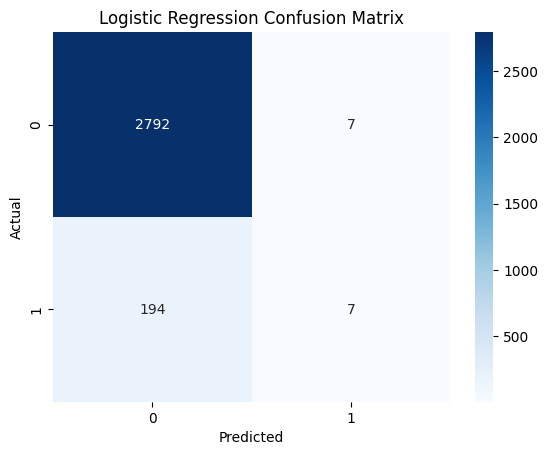

Neural Network:
[[2640  159]
 [ 152   49]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2799
           1       0.24      0.24      0.24       201

    accuracy                           0.90      3000
   macro avg       0.59      0.59      0.59      3000
weighted avg       0.90      0.90      0.90      3000



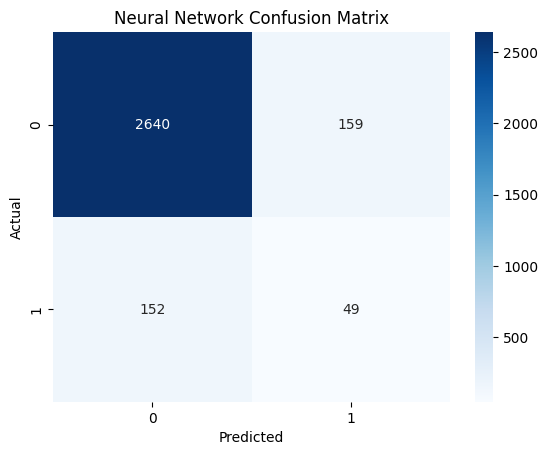

Decision Tree:
[[2630  169]
 [ 152   49]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2799
           1       0.22      0.24      0.23       201

    accuracy                           0.89      3000
   macro avg       0.59      0.59      0.59      3000
weighted avg       0.90      0.89      0.90      3000



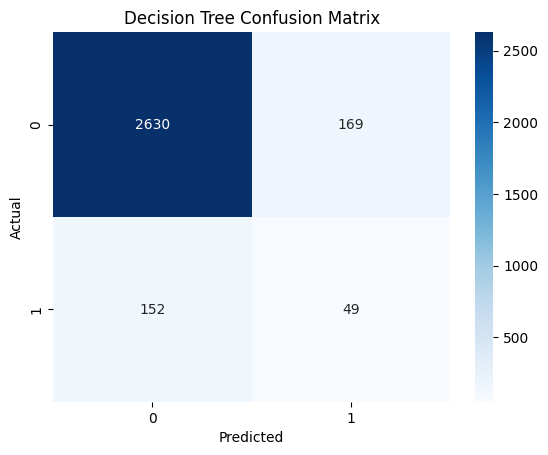

Random Forest:
[[2791    8]
 [ 181   20]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2799
           1       0.71      0.10      0.17       201

    accuracy                           0.94      3000
   macro avg       0.83      0.55      0.57      3000
weighted avg       0.92      0.94      0.91      3000



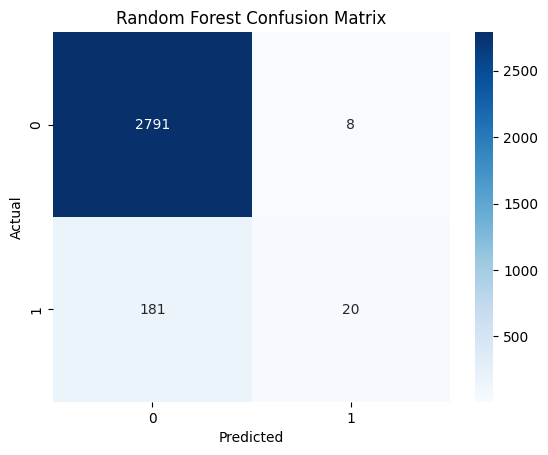

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


# Logistic Regression
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")

# Neural Network
print("Neural Network:")
print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))
plot_confusion_matrix(y_test, y_pred_nn, "Neural Network Confusion Matrix")

# Decision Tree
print("Decision Tree:")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree Confusion Matrix")

# Random Forest
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

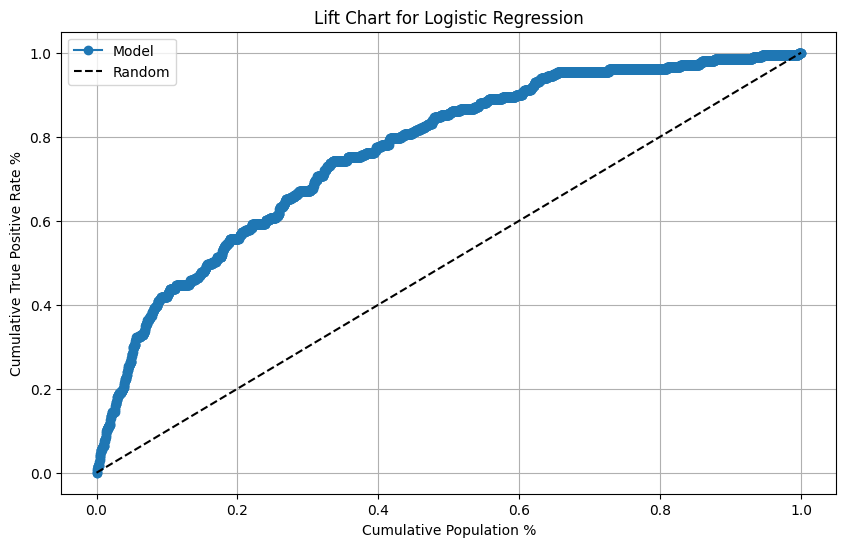

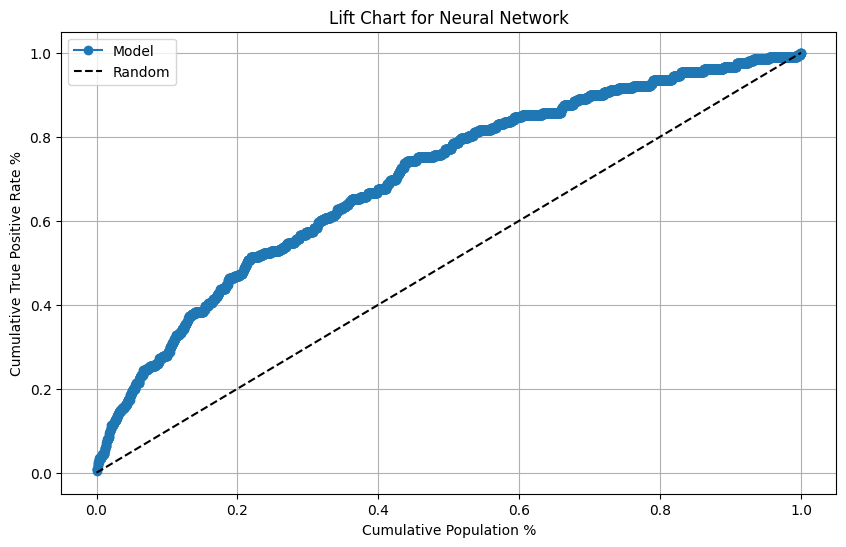

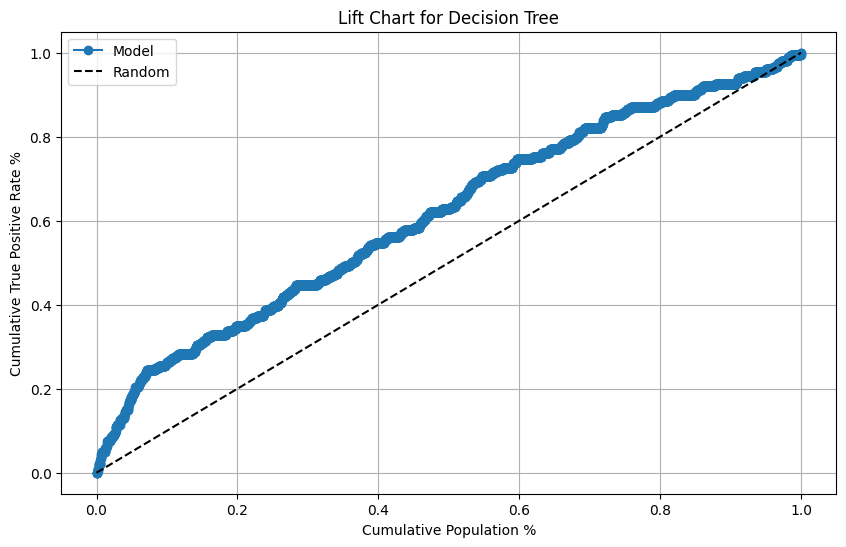

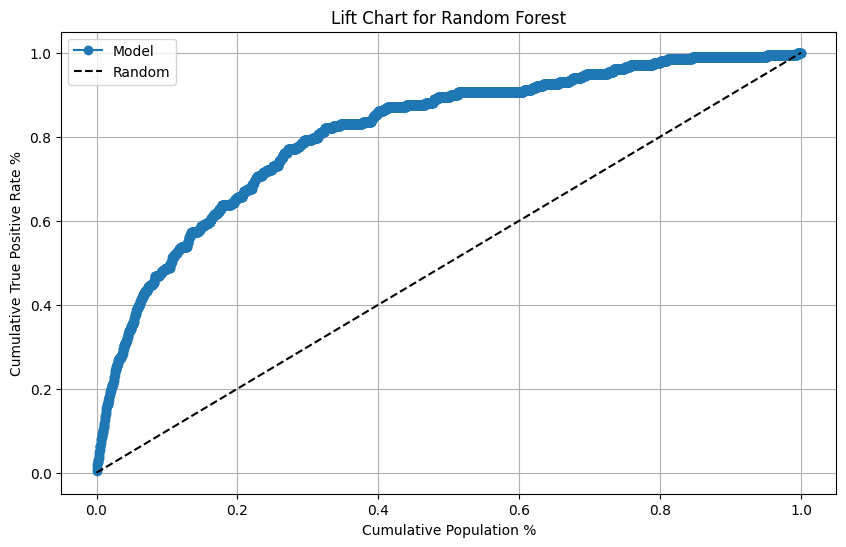

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# Function to calculate lift
def calculate_lift(y_true, y_prob):
    data = pd.DataFrame({"true": y_true, "prob": y_prob})
    data = data.sort_values(by="prob", ascending=False)
    data["cumulative_true"] = np.cumsum(data["true"])
    data["cumulative_true_rate"] = data["cumulative_true"] / data["true"].sum()
    data["cumulative_population"] = np.arange(1, len(data) + 1) / len(data)
    return data


# Function to plot lift chart
def plot_lift_chart(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(
        data["cumulative_population"],
        data["cumulative_true_rate"],
        marker="o",
        label="Model",
    )
    plt.plot([0, 1], [0, 1], "k--", label="Random")
    plt.title(title)
    plt.xlabel("Cumulative Population %")
    plt.ylabel("Cumulative True Positive Rate %")
    plt.legend()
    plt.grid(True)
    plt.show()


# Logistic Regression
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]
lift_data_log = calculate_lift(y_test, y_prob_log)
plot_lift_chart(lift_data_log, "Lift Chart for Logistic Regression")

# Neural Network
y_prob_nn = nn_model.predict_proba(X_test_scaled)[:, 1]
lift_data_nn = calculate_lift(y_test, y_prob_nn)
plot_lift_chart(lift_data_nn, "Lift Chart for Neural Network")

# Decision Tree
y_prob_tree = tree_model.predict_proba(X_test_scaled)[:, 1]
lift_data_tree = calculate_lift(y_test, y_prob_tree)
plot_lift_chart(lift_data_tree, "Lift Chart for Decision Tree")

# Random Forest
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
lift_data_rf = calculate_lift(y_test, y_prob_rf)
plot_lift_chart(lift_data_rf, "Lift Chart for Random Forest")


---

### **Business Objective and Recommendations**

#### **Business Objective:**
The main aim of this analysis was to anticipate **car cancellations** in order to help **Yourcabs.com** boost its operational efficiency and elevate customer satisfaction. By foreseeing which bookings are likely to be canceled, **Yourcabs.com** can take proactive measures such as reallocating resources, adjusting driver schedules, or even offering incentives to decrease cancellations. This would result in fewer service disruptions, cost savings, and an overall enhanced experience for the customers.

#### **Data Mining Models Used:**
To achieve this objective, we applied four different models:
1. **Logistic Regression**: Provides a strong, interpretable baseline. Its simplicity allows for clear insight into which features impact cancellations the most.
2. **Neural Networks**: Captures complex patterns that simpler models might miss, potentially improving accuracy but at the cost of interpretability.
3. **Decision Trees**: Offers easily interpretable decision rules and handles non-linear relationships between variables.
4. **Random Forest**: Combines multiple decision trees for improved robustness and accuracy, significantly reducing the risk of overfitting.

Each model brings distinct strengths and weaknesses to the table, but Random Forest emerged as the strongest performer in this context.

#### **Model Results:**
The models were evaluated based on their accuracy and ability to rank the likelihood of cancellations. Specifically:
- **Random Forest**: The best performer with the highest accuracy and lift score. It had a solid ability to distinguish between cancellations and non-cancellations, making it highly practical for deployment.
- **Logistic Regression**: Provided a useful baseline, though it struggled with more complex relationships in the data.
- **Neural Network**: Showed promise but was prone to overfitting without substantial performance improvements.
- **Decision Tree**: Worked reasonably well but did not outperform Random Forest.

The lift charts for each model confirmed the superiority of the Random Forest model in terms of predictive power. This model consistently identified high-risk cancellations, meaning it can reliably guide operational decisions.

#### **Recommendations:**
We recommend **implementing the Random Forest model** within **Yourcabs.com**'s booking system to flag bookings at high risk of cancellation. This can trigger early interventions such as sending alerts to the operations team or incentivizing drivers to complete potentially problematic trips. Additionally, this system can enhance the customer experience by ensuring fewer last-minute cancellations.

#### **Next Steps:**
1. **Deploy the Random Forest model** within the live booking system to flag risky bookings automatically.
2. **Continuous monitoring** of model performance is recommended. Periodic retraining of the model will ensure that it stays relevant as booking patterns and market conditions evolve.
3. **Further optimization** could include testing additional algorithms, tuning model hyperparameters, and even integrating external data sources (e.g., weather, traffic) to refine predictions.

By utilizing this predictive capability, **Yourcabs.com** will be able to optimize its resources, reduce customer dissatisfaction, and maintain its competitive edge in a highly dynamic market.

---
